In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

In [2]:
#kaggle link:  https://www.kaggle.com/code/prakharprasad/time-series-varma/input?select=M2SLMoneyStock.csv

# import data
df1= pd.read_csv(r"C:\Users\MMM\Downloads\Eco and finance\M2SLMoneyStock.csv")
df2= pd.read_csv(r"C:\Users\MMM\Downloads\Eco and finance\PCEPersonalSpending.csv")

In [3]:
new_df = pd.concat([df1,df2['Spending']],axis=1 , join='inner')
new_df.set_index('Date')

,Money,Spending
Date,,
1/1/1995,3492.4,4851.2
2/1/1995,3489.9,4850.8
3/1/1995,3491.1,4885.4
4/1/1995,3499.2,4890.2
5/1/1995,3524.2,4933.1
...,...,...
8/1/2015,12096.8,12394.0
9/1/2015,12153.8,12392.8
10/1/2015,12187.7,12416.1


<AxesSubplot:>

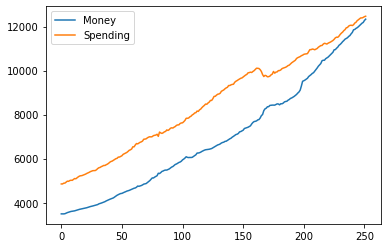

In [4]:
# plot the time series data
new_df.plot()

####    #stationary checking

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
test_result = adfuller(new_df['Money'])
test_result1 = adfuller(new_df['Spending'])

In [7]:
def adf_test(series,title = ''):
    print(f'Augumented Dicker - Fuller Test : {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistic', 'p-value','#lags used','#observation']
    out = pd.Series(result[0:4],index = labels)
    for key,val in result[4].items():
        out[f'critical value({key})']=val
    print(out.to_string())
    if result[1] <=0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [8]:
adf_test(new_df['Money'])

Augumented Dicker - Fuller Test : 
ADF test statistic       4.239022
p-value                  1.000000
#lags used               4.000000
#observation           247.000000
critical value(1%)      -3.457105
critical value(5%)      -2.873314
critical value(10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [9]:
adf_test(new_df['Spending'])

Augumented Dicker - Fuller Test : 
ADF test statistic       0.149796
p-value                  0.969301
#lags used               3.000000
#observation           248.000000
critical value(1%)      -3.456996
critical value(5%)      -2.873266
critical value(10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [10]:
#money
new_diff = np.sqrt(new_df['Money'])
df_diff = new_diff.diff().dropna()
adf_test(df_diff)

Augumented Dicker - Fuller Test : 
ADF test statistic    -6.694135e+00
p-value                4.039577e-09
#lags used             3.000000e+00
#observation           2.470000e+02
critical value(1%)    -3.457105e+00
critical value(5%)    -2.873314e+00
critical value(10%)   -2.573044e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [11]:
# spending
new_diff_s = np.sqrt(new_df['Spending'])
df_diff_sp = new_diff_s.diff().dropna()
adf_test(df_diff_sp)

Augumented Dicker - Fuller Test : 
ADF test statistic    -7.282439e+00
p-value                1.488269e-10
#lags used             2.000000e+00
#observation           2.480000e+02
critical value(1%)    -3.456996e+00
critical value(5%)    -2.873266e+00
critical value(10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [12]:
# Model creation:

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [14]:
new_df = new_df.dropna()  # Drop rows with missing values
new_df.isna().sum()

Date        0
Money       0
Spending    0
dtype: int64

In [15]:
new_df = new_df.drop('Date', axis=1)

In [16]:
model = VAR(new_df)

In [38]:
result = model.fit(5)

In [39]:
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 18, Nov, 2023
Time:                     00:10:47
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.8778
Nobs:                     247.000    HQIC:                   13.6911
Log likelihood:          -2354.26    FPE:                    778666.
AIC:                      13.5652    Det(Omega_mle):         713683.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -3.578575        10.765839           -0.332           0.740
L1.Money            1.166264         0.064984           17.947           0.000
L1.Spending        -0.128001         0.049702           -2.575      

In [40]:
lag_order =5
forecast_period = 10

forcast_values = result.forecast(new_df.values[-lag_order:],steps = forecast_period)


In [41]:
forecast_df=pd.DataFrame(forcast_values, columns=new_df.columns)

In [42]:
print('Forecasted values:  ')
print(forecast_df)

Forecasted values:  
          Money      Spending
0  12391.288699  12501.807540
1  12457.812163  12536.818951
2  12515.035869  12570.731641
3  12572.408886  12606.823193
4  12632.889183  12644.434099
5  12691.322436  12682.335139
6  12750.496649  12721.108289
7  12810.372148  12760.449207
8  12869.967201  12799.991513
9  12930.020801  12839.905236


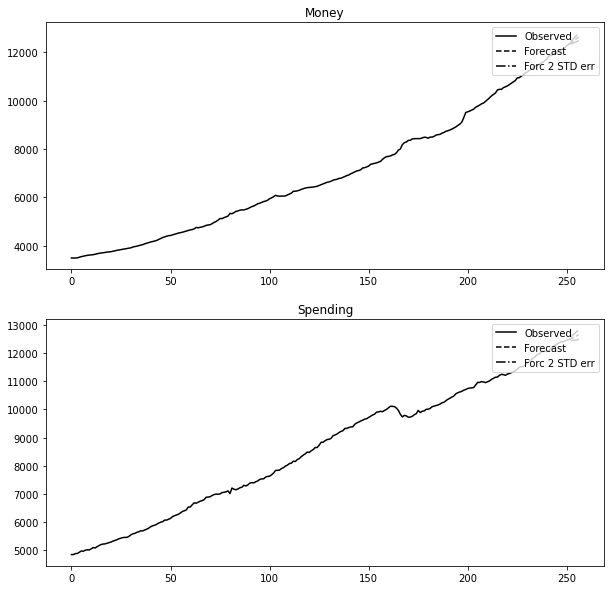

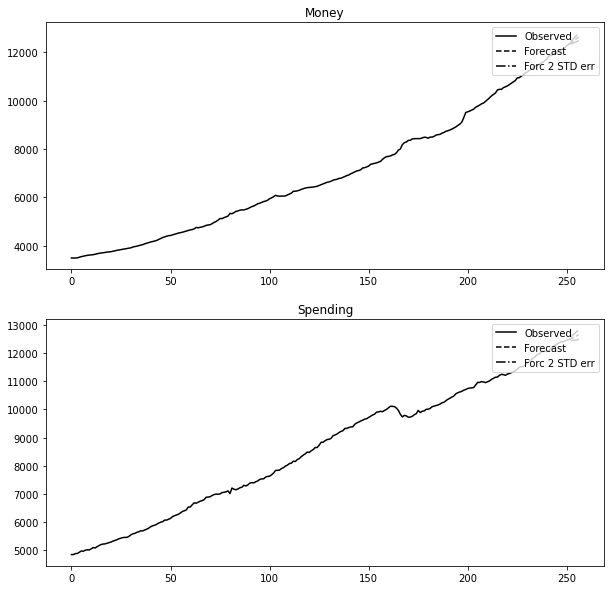

In [43]:
result.plot_forecast(5)